In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
import MegaScreen
import numpy as np
import scipy.integrate
from test_Noll import Noll
from test_spectrum import interf_spectrum_quad as interf_spectrum
import functools
from MegaScreen import VonKarmanSpectrum, NestedSpectra

%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 200
matplotlib.rcParams['text.usetex'] = False

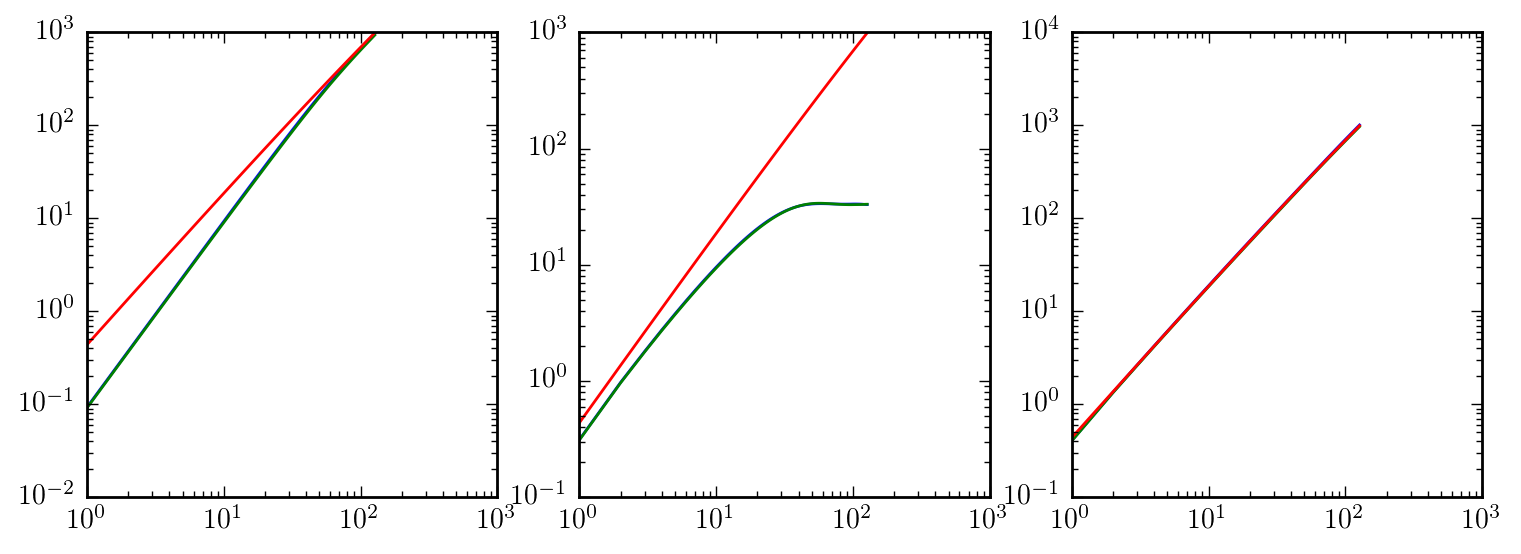

In [8]:
def PlotSf3(filename):
    t=Table.read(filename,format="ascii.ecsv")
    plt.figure(figsize=(9, 3))
    r=t["r"]
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.loglog(r, t["sf_x"+str(i)])
        plt.loglog(r, t["sf_y"+str(i)])
        plt.loglog(r, t["model"])
PlotSf3("data/multi160809-1657.dat")
plt.savefig("component_sf.svg")
plt.savefig("component_sf.png")

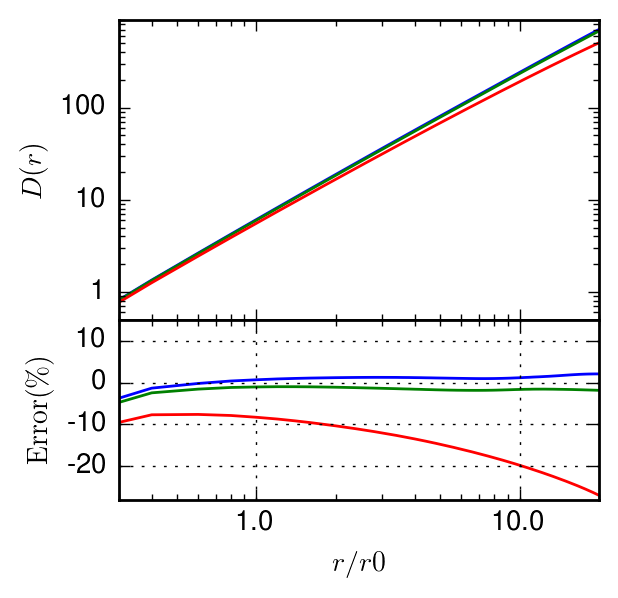

In [6]:
def sf_plot(f1,f2):
    fig1 = plt.figure(figsize=(3,3))
#Plot Data-model
    frame1=fig1.add_axes((.1,.4,.8,.5))
    #plt.subplot(2,1,1)
    t1=Table.read(f1,format="ascii.ecsv")
    r1=t1["r"]/t1.meta["r0"]
    plt.loglog(r1,t1["sf_x2"],label="x")
    plt.loglog(r1,t1["sf_y2"],label="y")
    t2=Table.read(f2,format="ascii.ecsv")
    r2=t2["r"]/t1.meta["r0"]
    plt.loglog(r2,t2["sf_x"],label="FFT")
    plt.axis([0.3,20,0.5,900])
    #plt.legend()
    plt.ylabel("$D(r)$")
    ax=plt.gca()
    ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #plt.subplot(2,1,2)
    frame2=fig1.add_axes((.1,.1,.8,.3))
    plt.semilogx(r1,100*(t1["sf_x2"]/t1["model"]-1))
    plt.semilogx(r1,100*(t1["sf_y2"]/t1["model"]-1))
    plt.semilogx(r2,100*(t2["sf_x"]/t2["model"]-1))
    plt.axis([0.3,20,-28,15])
    plt.xlabel("$r/r0$")
    plt.ylabel(r"$\rm Error (\%)$")
    plt.yticks([-20,-10,0,10])
    plt.grid()
    ax=plt.gca()
    ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

sf_plot("data/multi160809-1657.dat","data/mcglamery160731-1215.dat")
matplotlib.rcParams['text.usetex'] = True
plt.savefig("structure_fn.svg",bbox_inches="tight")

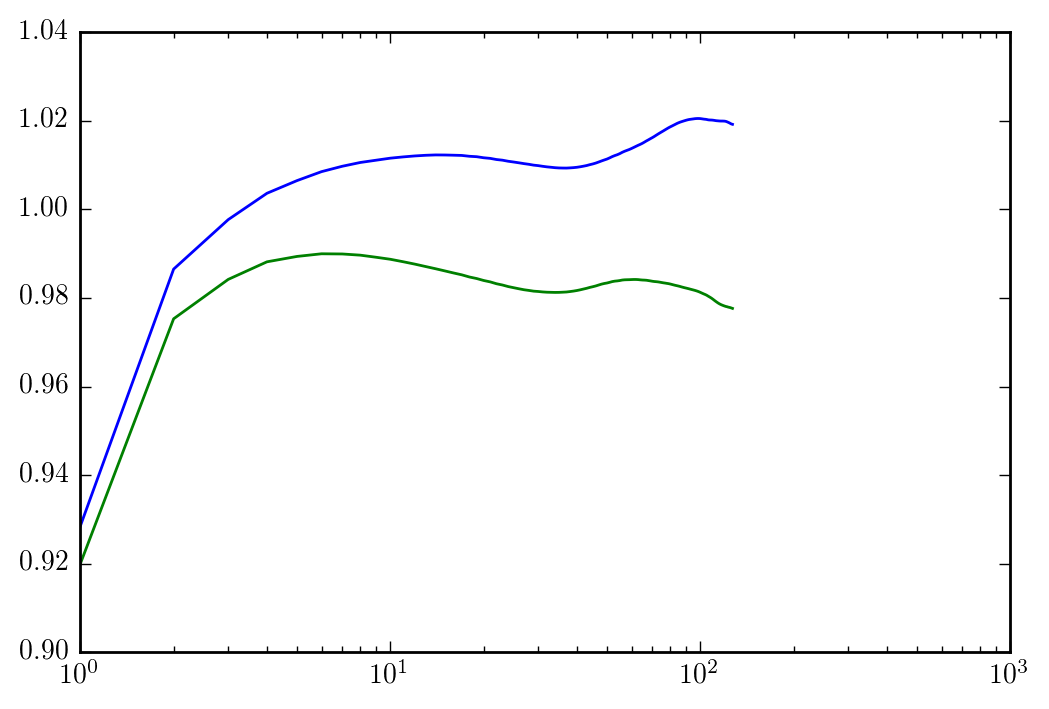

In [7]:
t=Table.read("data/multi160809-1657.dat",format="ascii.ecsv")
plt.semilogx(t["r"],t["sf_x2"]/t["model"])
plt.semilogx(t["r"],t["sf_y2"]/t["model"])